In [29]:
import pandas as pd
import numpy as np
import time, warnings
import datetime as dt
import matplotlib.pyplot as plot
df = pd.read_excel(r"C:\Users\nishantsi\Documents\Learning\IIT-G AI ML\Capstone\Online Retail.xlsx")
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [24]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [26]:
pd.value_counts(df.Description)

WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
                                      ... 
ROCOCO WALL MIROR                        1
GARDENERS KNEELING PAD                   1
ORANGE/FUSCHIA STONES NECKLACE           1
HEAVENS SCENT FRAGRANCE OILS ASSTD       1
MINT DINER CLOCK                         1
Name: Description, Length: 4223, dtype: int64

In [5]:
pd.value_counts(df.CustomerID)

17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
13391.0       1
16579.0       1
13366.0       1
17763.0       1
17846.0       1
Name: CustomerID, Length: 4372, dtype: int64

In [12]:
len(df['Description'].unique())

4224

In [7]:
len(df['CustomerID'].unique()) 

4373

In [8]:
len(df['Country'].unique()) 

38

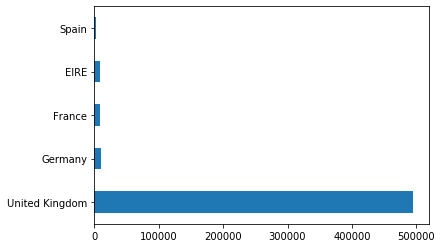

In [9]:
df['Country'].value_counts()[:5].plot(kind='barh')

In [10]:
#Since large majority of customers are from UK, lets exclude customers from other countries for segmentation analysis
df_uk = df[df['Country']=='United Kingdom']
df_uk.shape

(495478, 8)

In [13]:
#removing cancelled orders
df_uk = df_uk[df_uk['Quantity']>0]
df_uk.shape

(486286, 8)

In [14]:
#removing rows with blank Customer IDs
df_uk.dropna(subset=['CustomerID'],how='all',inplace=True)
df_uk.shape

(354345, 8)

In [15]:
#Summarizing the key metrics within the processed dataset
print("Summary..")
print("Number of transactions: ", df_uk['InvoiceNo'].nunique())
print("Number of products bought: ",df_uk['StockCode'].nunique())
print("Number of customers:", df_uk['CustomerID'].nunique() )
print("Percentage of customers NA: ", round(df_uk['CustomerID'].isnull().sum() * 100 / len(df),2),"%" )

Summary..
Number of transactions:  16649
Number of products bought:  3645
Number of customers: 3921
Percentage of customers NA:  0.0 %


In [16]:
#Recency-Frequency-Monetary Analysis
#Step 1 - Recency Analysis
#"Recency" highlights how recent has been the customer purchase
#Identify the date of oldest purchase in the dataset and use it as a reference point

df_uk['InvoiceDate'].max()

Timestamp('2011-12-09 12:49:00')

In [17]:
#create a new column called date which contains the date of invoice only
df_uk['Date'] = pd.DatetimeIndex(df_uk['InvoiceDate']).date
df_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01


In [50]:
#group by customers and check last date of purchase
recency_df = df_uk.groupby(by='CustomerID', as_index=False)['Date'].max()
recency_df.columns = ['CustomerID','LastPurchaseDate']
recency_df.head(8)

,CustomerID,LastPurchaseDate
0,12346.0,2011-01-18
1,12747.0,2011-12-07
2,12748.0,2011-12-09
3,12749.0,2011-12-06
4,12820.0,2011-12-06
5,12821.0,2011-05-09
6,12822.0,2011-09-30
7,12823.0,2011-09-26


In [33]:
now = dt.date(2011,12,9)
print(now)

2011-12-09


In [52]:
#calculate recency
recency_df['Recency'] = recency_df['LastPurchaseDate'].apply(lambda x: (now - x).days)
recency_df.head()

,CustomerID,LastPurchaseDate,Recency
0,12346.0,2011-01-18,325
1,12747.0,2011-12-07,2
2,12748.0,2011-12-09,0
3,12749.0,2011-12-06,3
4,12820.0,2011-12-06,3


In [54]:
#drop LastPurchaseDate as we don't need it anymore
recency_df.drop('LastPurchaseDate',axis=1,inplace=True)

In [55]:
#Step 2 - Frequency Analysis
#"Frequency" highlights how often has been the customer purchase
#Identify the number of unique invoices generated for each customer
# drop duplicates
df_uk_copy = df_uk
df_uk_copy.drop_duplicates(subset=['InvoiceNo', 'CustomerID'], keep="first", inplace=True)
#calculate frequency of purchases
frequency_df = df_uk_copy.groupby(by=['CustomerID'], as_index=False)['InvoiceNo'].count()
frequency_df.columns = ['CustomerID','Frequency']
frequency_df.head(8)

,CustomerID,Frequency
0,12346.0,1
1,12747.0,11
2,12748.0,210
3,12749.0,5
4,12820.0,4
5,12821.0,1
6,12822.0,2
7,12823.0,5


In [56]:
#Step 3 - Monetary Analysis
#"Monetary" highlights how much money has the customer spent over a defined period
#Create a new column "TotalCost" to have the total amount per invoice
df_uk['TotalCost'] = df_uk['Quantity'] * df_uk['UnitPrice']

#calculate monetary value per customer
monetary_df = df_uk.groupby(by='CustomerID',as_index=False).agg({'TotalCost': 'sum'})
monetary_df.columns = ['CustomerID','Monetary']
monetary_df.head(8)

,CustomerID,Monetary
0,12346.0,77183.60
1,12747.0,689.49
2,12748.0,3841.31
3,12749.0,98.35
4,12820.0,58.20
5,12821.0,19.92
6,12822.0,30.80
7,12823.0,1759.50


In [57]:
#Create RFM matrix 
#Step 1 - Merge Recency and Frequency
temp_df = recency_df.merge(frequency_df,on='CustomerID')
temp_df.head()

,CustomerID,Recency,Frequency
0,12346.0,325,1
1,12747.0,2,11
2,12748.0,0,210
3,12749.0,3,5
4,12820.0,3,4


In [59]:
#merge with monetary data to get a table with the 3 columns
rfm_df = temp_df.merge(monetary_df,on='CustomerID')
rfm_df.set_index('CustomerID',inplace=True)
rfm_df.head(10)

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,11,689.49
12748.0,0,210,3841.31
12749.0,3,5,98.35
12820.0,3,4,58.20
12821.0,214,1,19.92
12822.0,70,2,30.80
12823.0,74,5,1759.50
12824.0,59,1,5.04


In [60]:
#In order to identify customer segments, lets use quartile method to prepare clusters 
#We assign a score from 1 to 4 to Recency, Frequency and Monetary
#Four is the best/highest value, and one is the lowest/worst value
#A final RFM score is calculated simply by combining individual RFM score numbers
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,Frequency,Monetary
0.25,17.0,1.0,17.7
0.50,50.0,2.0,45.4
0.75,142.0,5.0,124.5


In [61]:
quantiles.to_dict()

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 142.0},
 'Frequency': {0.25: 1.0, 0.5: 2.0, 0.75: 5.0},
 'Monetary': {0.25: 17.700000000000003, 0.5: 45.4, 0.75: 124.50000000000001}}

In [62]:
#Segment class 1 - for low recency 
#Segment class 2 - for high frequence and monetary value 
#Segment class 1 - Arguments (x = value, p = recency, d = quartiles dict)
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
    
#Segment class 2 - Arguments (x = value, p = frequecy,monetary value, d = quartiles dict)
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
#create rfm segmentation table
rfm_segmentation = rfm_df
rfm_segmentation['R_Quartile'] = rfm_segmentation['Recency'].apply(RScore, args=('Recency',quantiles,))
rfm_segmentation['F_Quartile'] = rfm_segmentation['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
rfm_segmentation['M_Quartile'] = rfm_segmentation['Monetary'].apply(FMScore, args=('Monetary',quantiles,))
rfm_segmentation.head()

    

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile
CustomerID,,,,,,
12346.0,325,1,77183.60,1,1,4
12747.0,2,11,689.49,4,4,4
12748.0,0,210,3841.31,4,4,4
12749.0,3,5,98.35,4,3,3
12820.0,3,4,58.20,4,3,3


In [63]:
#combine the scores (R_Quartile, F_Quartile,M_Quartile) together
rfm_segmentation['RFMScore'] = rfm_segmentation.R_Quartile.map(str) \
                            + rfm_segmentation.F_Quartile.map(str) \
                            + rfm_segmentation.M_Quartile.map(str)
rfm_segmentation.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,
12346.0,325,1,77183.60,1,1,4,114
12747.0,2,11,689.49,4,4,4,444
12748.0,0,210,3841.31,4,4,4,444
12749.0,3,5,98.35,4,3,3,433
12820.0,3,4,58.20,4,3,3,433


In [64]:
#Interpretation of RFM score 
#Best Recency score = 4: most recently purchase
#Best Frequency score = 4: most quantity purchase
#Best Monetary score = 4: spent the most
#Sort RFM score in descending order to identify best customers 
rfm_segmentation[rfm_segmentation['RFMScore']=='444'].sort_values('Monetary', ascending=False).head(20)

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,
18102.0,0,60,42053.60,4,4,4,444
17949.0,1,45,29999.69,4,4,4,444
17450.0,8,46,26768.97,4,4,4,444
16013.0,3,47,17895.28,4,4,4,444
16333.0,7,22,14418.96,4,4,4,444
15769.0,7,26,11752.64,4,4,4,444
12901.0,8,28,9230.45,4,4,4,444
13798.0,1,57,8194.26,4,4,4,444
16684.0,4,28,7700.08,4,4,4,444


In [65]:
#Specific customer segments count
print("Best Customers: ",len(rfm_segmentation[rfm_segmentation['RFMScore']=='444']))
print('Loyal Customers: ',len(rfm_segmentation[rfm_segmentation['F_Quartile']==4]))
print("Big Spenders: ",len(rfm_segmentation[rfm_segmentation['M_Quartile']==4]))
print('Almost Lost: ', len(rfm_segmentation[rfm_segmentation['RFMScore']=='244']))
print('Lost Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='144']))
print('Lost Cheap Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='111']))

Best Customers:  370
Loyal Customers:  791
Big Spenders:  980
Almost Lost:  65
Lost Customers:  11
Lost Cheap Customers:  377
